In [91]:
from importlib.metadata import version
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt
import cv2
import pixellib
import os
import urllib
import cv2
import numpy as np


print(cv2.__version__)
print(version('pixellib'))

4.5.3
0.7.1


(479, 720, 3)


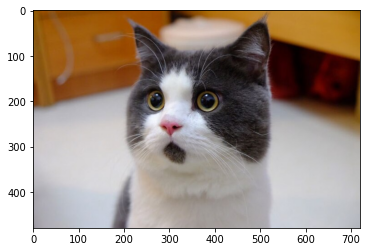

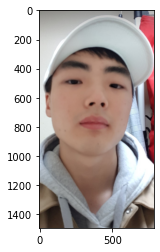

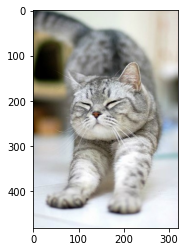

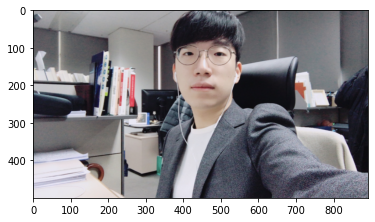

In [92]:
# 이미지 불러오기

img_path1 = os.getenv('HOME')+'/aiffel/human_segmentation/images/2.jpeg'
img_path2 = os.getenv('HOME')+'/aiffel/human_segmentation/images/3.jpg'
img_path3 = os.getenv('HOME')+'/aiffel/human_segmentation/images/4.jpg'
img_path4 = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_image.png'

# 불러온 이미지 변수 선언

img_orig1 = cv2.imread(img_path1)
img_orig2 = cv2.imread(img_path2)
img_orig3 = cv2.imread(img_path3)
img_orig4 = cv2.imread(img_path4)

# 하나만 뽑아서 형태 확인

print(img_orig1.shape)

plt.imshow(cv2.cvtColor(img_orig1, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_orig2, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_orig3, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_orig4, cv2.COLOR_BGR2RGB))
plt.show()

In [93]:
# 사용할 모델 불러오기, deeplabv3 xception

model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f0736bf3880>)

In [94]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [114]:
segvalues1, output1 = model.segmentAsPascalvoc(img_path1) # .segmentAsPascalvoc 안에 인자로 넣은 이미지를 두 개의 변수로 분할
segvalues2, output2 = model.segmentAsPascalvoc(img_path2)
segvalues3, output3 = model.segmentAsPascalvoc(img_path3)
segvalues4, output4 = model.segmentAsPascalvoc(img_path4)

In [96]:
# pascalvoc 데이터의 라벨 종류 

LABEL_NAMES = ['background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
              'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
              'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv']
len(LABEL_NAMES)

21

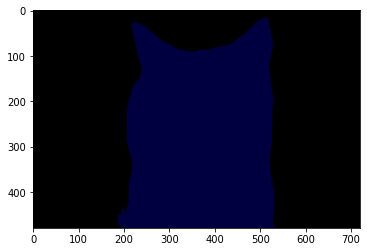

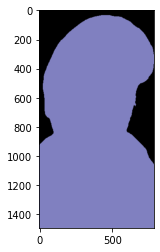

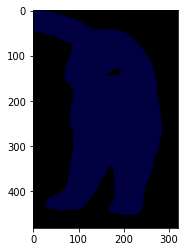

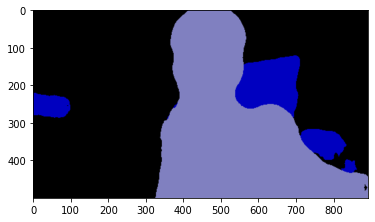

In [97]:
# 분할한 이미지 중 output에 해당하는 이미지 출력

plt.imshow(output1)
plt.show()
plt.imshow(output2)
plt.show()
plt.imshow(output3)
plt.show()
plt.imshow(output4)
plt.show()

In [98]:
# segmentAsPascalvoc() 함수를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 배열값을 출력

segvalues1
print(segvalues1)
segvalues2
print(segvalues2)
segvalues3
print(segvalues3)
segvalues4

{'class_ids': array([0, 8]), 'masks': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])}
{'class_ids': array([ 0, 15]), 'masks': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])}
{'class_ids': array([0, 8]), 'masks': array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
    

{'class_ids': array([ 0,  9, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]])}

In [99]:
# 해당하는 라벨 출력

for class_id in segvalues1['class_ids']:
    print(LABEL_NAMES[class_id])
print('\n')
for class_id in segvalues2['class_ids']:
    print(LABEL_NAMES[class_id])
print('\n')
for class_id in segvalues3['class_ids']:
    print(LABEL_NAMES[class_id])
print('\n')
for class_id in segvalues4['class_ids']:
    print(LABEL_NAMES[class_id])

background
cat


background
person


background
cat


background
chair
person


In [100]:
# 컬러맵 만들기 (모름)

colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype = int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3
    
colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [101]:
# 해당 인자 컬러맵 출력 → 8 : 고양이, 15 : 사람 

print(colormap[15])
print(colormap[8])

[192 128 128]
[64  0  0]


In [102]:
# 색상 순서 변경하는 이유 - colormap의 배열은 RGB 순, output의 배열은 채널이 반대로 배치됨

seg_color1 = (128, 128, 192) # 사람일 경우
seg_color2 = (0, 0, 64) # 고양이일 경우

(479, 720)
(1493, 785)
(481, 320)
(500, 892)


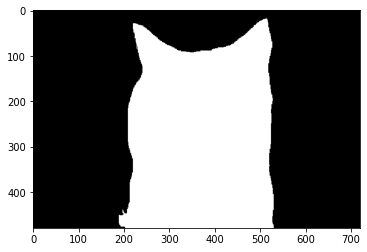

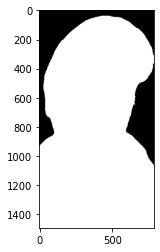

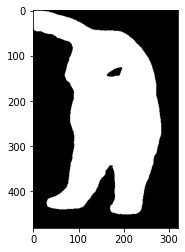

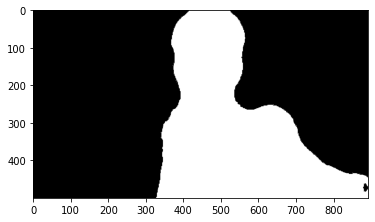

In [103]:
# output의 픽셀별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)가 됨
# seg_color 값이 person, cat 값이므로 사람 위치 제외하고서는 gray로 출력

seg_map1 = np.all(output1==seg_color2, axis = -1)
print(seg_map1.shape)
seg_map2 = np.all(output2==seg_color1, axis = -1)
print(seg_map2.shape)
seg_map3 = np.all(output3==seg_color2, axis = -1)
print(seg_map3.shape)
seg_map4 = np.all(output4==seg_color1, axis = -1)
print(seg_map4.shape)


plt.imshow(seg_map1, cmap = 'gray')
plt.show()
plt.imshow(seg_map2, cmap = 'gray')
plt.show()
plt.imshow(seg_map3, cmap = 'gray')
plt.show()
plt.imshow(seg_map4, cmap = 'gray')
plt.show()

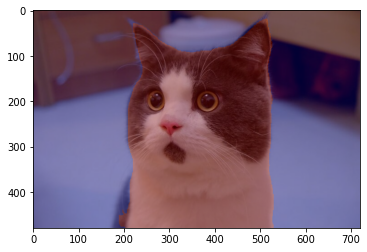

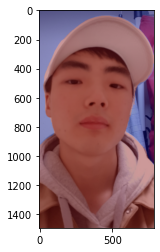

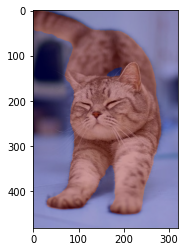

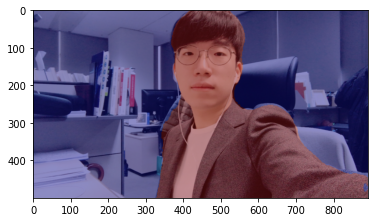

In [112]:
# 원본 이미지 변수 할당 후 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask를 만든 뒤 두 이미지를 합쳐서 출력

img_show1 = img_orig1.copy()
img_show2 = img_orig2.copy()
img_show3 = img_orig3.copy()
img_show4 = img_orig4.copy()

# True와 False인 값을 각각 255와 0으로 변경

img_mask1 = seg_map1.astype(np.uint8) * 255
img_mask2 = seg_map2.astype(np.uint8) * 255
img_mask3 = seg_map3.astype(np.uint8) * 255
img_mask4 = seg_map4.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 변경

color_mask1 = cv2.applyColorMap(img_mask1, cv2.COLORMAP_JET)
color_mask2 = cv2.applyColorMap(img_mask2, cv2.COLORMAP_JET)
color_mask3 = cv2.applyColorMap(img_mask3, cv2.COLORMAP_JET)
color_mask4 = cv2.applyColorMap(img_mask4, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐보기
# 0.6과 0.4는 두 이미지를 섞는 비율

img_show1 = cv2.addWeighted(img_show1, 0.6, color_mask1, 0.4, 0.0)
img_show2 = cv2.addWeighted(img_show2, 0.6, color_mask2, 0.4, 0.0) # 이 과정에서 두 번째 원본 이미지의 크기가 규격 외라서 사이즈 조정을 거쳐야함, 
                                                                   # 리사이즈로 해결되지 않는 것 같아 원본 이미지 파일을 수정 후 다시 불러옴
img_show3 = cv2.addWeighted(img_show3, 0.6, color_mask3, 0.4, 0.0)
img_show4 = cv2.addWeighted(img_show4, 0.6, color_mask4, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show1, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_show2, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_show3, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_show4, cv2.COLOR_BGR2RGB))
plt.show()

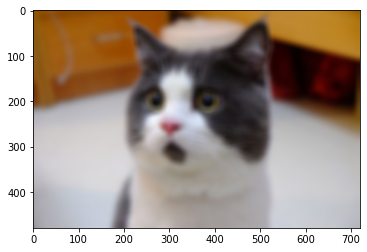

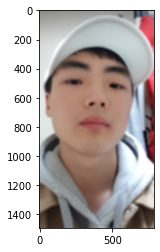

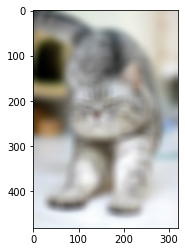

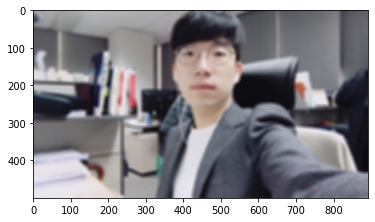

In [107]:
# blur 안의 숫자 인자는 blurring kernel size를 의미, 변경 가능

img_orig_blur1 = cv2.blur(img_orig1, (15, 15))
img_orig_blur2 = cv2.blur(img_orig2, (17, 17))
img_orig_blur3 = cv2.blur(img_orig3, (19, 19))
img_orig_blur4 = cv2.blur(img_orig4, (11, 11))

# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽어서 이미지 색상 채널 변경 필요 (BGR → RGB)

plt.imshow(cv2.cvtColor(img_orig_blur1, cv2.COLOR_BGR2RGB)) 
plt.show()
plt.imshow(cv2.cvtColor(img_orig_blur2, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_orig_blur3, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_orig_blur4, cv2.COLOR_BGR2RGB))
plt.show()

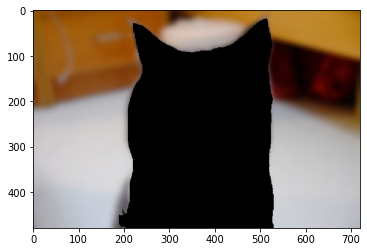

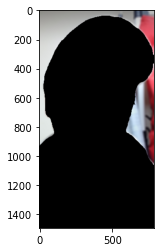

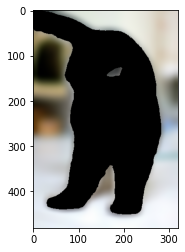

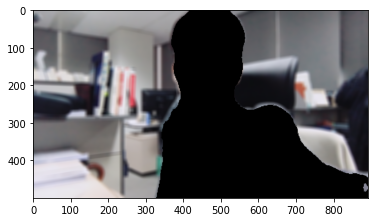

In [108]:
img_mask_color1 = cv2.cvtColor(img_mask1, cv2.COLOR_GRAY2BGR)
img_mask_color2 = cv2.cvtColor(img_mask2, cv2.COLOR_GRAY2BGR)
img_mask_color3 = cv2.cvtColor(img_mask3, cv2.COLOR_GRAY2BGR)
img_mask_color4 = cv2.cvtColor(img_mask4, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): 이미지가 반전됨, 배경이 0 사람이 255 였는데 연산 하면 서로 바뀜

img_bg_mask1 = cv2.bitwise_not(img_mask_color1)
img_bg_mask2 = cv2.bitwise_not(img_mask_color2)
img_bg_mask3 = cv2.bitwise_not(img_mask_color3)
img_bg_mask4 = cv2.bitwise_not(img_mask_color4)

# cv2/bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있음
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에
# 사람이 0인 경우는 사람이 있던 모든 픽셀이 0이 됨 (배경만 남음)

img_bg_blur1 = cv2.bitwise_and(img_orig_blur1, img_bg_mask1)
img_bg_blur2 = cv2.bitwise_and(img_orig_blur2, img_bg_mask2)
img_bg_blur3 = cv2.bitwise_and(img_orig_blur3, img_bg_mask3)
img_bg_blur4 = cv2.bitwise_and(img_orig_blur4, img_bg_mask4)

plt.imshow(cv2.cvtColor(img_bg_blur1, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_bg_blur2, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_bg_blur3, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_bg_blur4, cv2.COLOR_BGR2RGB))
plt.show()

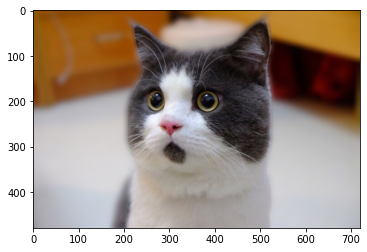

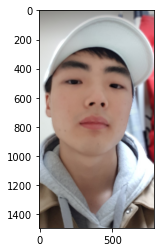

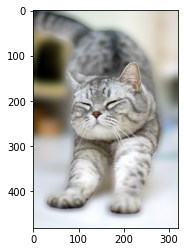

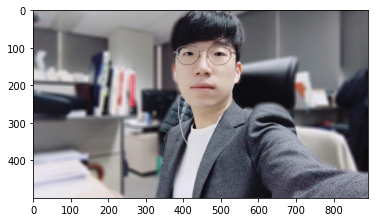

In [110]:
# np.where(조건 참일때, 거짓일때)
# segmentation mask가 255인 부분만 원본 이미지 값을 가져옴
# 아닌 영역은 블러된 이미지 값을 사용

img_concat1 = np.where(img_mask_color1==255, img_orig1, img_bg_blur1)
img_concat2 = np.where(img_mask_color2==255, img_orig2, img_bg_blur2)
img_concat3 = np.where(img_mask_color3==255, img_orig3, img_bg_blur3)
img_concat4 = np.where(img_mask_color4==255, img_orig4, img_bg_blur4)

plt.imshow(cv2.cvtColor(img_concat1, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_concat2, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_concat3, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_concat4, cv2.COLOR_BGR2RGB))
plt.show()

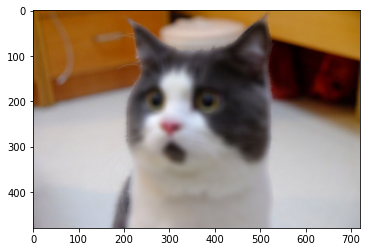

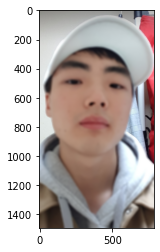

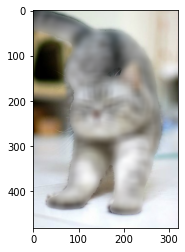

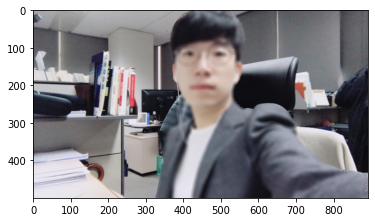

In [111]:
img_concat1_1 = np.where(img_mask_color1==0, img_orig1, img_orig_blur1) # 사진 전체가 흐려짐_1
img_concat2_1 = np.where(img_mask_color2==0, img_orig2, img_orig_blur2) 
img_concat3_1 = np.where(img_mask_color3==0, img_orig3, img_orig_blur3) # 사진 전체가 흐려짐_2
img_concat4_1 = np.where(img_mask_color4==0, img_orig4, img_orig_blur4)  

plt.imshow(cv2.cvtColor(img_concat1_1, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_concat2_1, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_concat3_1, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_concat4_1, cv2.COLOR_BGR2RGB))
plt.show()

## 인물 사진 크롭 (누끼) 후 어떻게 딱 배경 이미지를 삽입하는지?
* → 그냥 넣을 배경 이미지 넣고, 불러온 다옴 변수 지정 후 인자에 넣는 식으로 간단하게 되는지

## 사진에서의 문제점

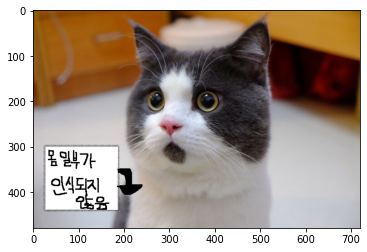

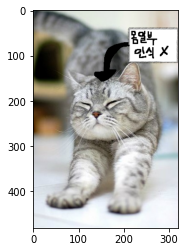

In [113]:
img_path1_1 = os.getenv('HOME')+'/aiffel/human_segmentation/images/111.png'
img_path1_2 = os.getenv('HOME')+'/aiffel/human_segmentation/images/112.png'

img_orig1_1 = cv2.imread(img_path1_1)
img_orig2_1 = cv2.imread(img_path1_2)

plt.imshow(cv2.cvtColor(img_orig1_1, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_orig2_1, cv2.COLOR_BGR2RGB))
plt.show()

2번째 이미지에서는 문제점을 못찾았고, 4번째 이미지는 샘플용 노드 이미지여서 표시하지 않았습니다.

## 어떻게 해결해야 하는가?

세그멘테이션을 제대로 잡기 힘듦 (일부가 인식되지 않는 문제)

* 인식하게 하려면 어떻게 해결해야 하는가?

    → 동적인 데이터라면(영상), 주변의 옷가지를 제외할 수 있도록 pose esitimate 또한 적용하여 움직이는 대상 주변의 옷가지(대상이 입고 있는 옷)만 잡히도록 한다.
    
    → 정적인 데이터라면(이미지), 학습을 많이 하는 방법 뿐인가? ▶ 학습을 많이 하더라도 배경과 비슷한 색감이나 재질 (대상이 고양이일 경우로 예를 들면 털이 많이 달린 카펫이 있는 배경)의 구분에 한계가 있어보임
        ▷ 그러면 어떻게 해결이 가능할까?
    